#### Redes Neurais

#### Passo 1: Instalar bibliotecas

In [ ]:
#!pip install pandas
#!pip install keras
#!pip install matplotlib
#!pip install scikit-learn

#### Passo 2: Importar bibliotecas

In [3]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

#### Passo 3: Carregar base de dados

In [4]:
data = load_iris()

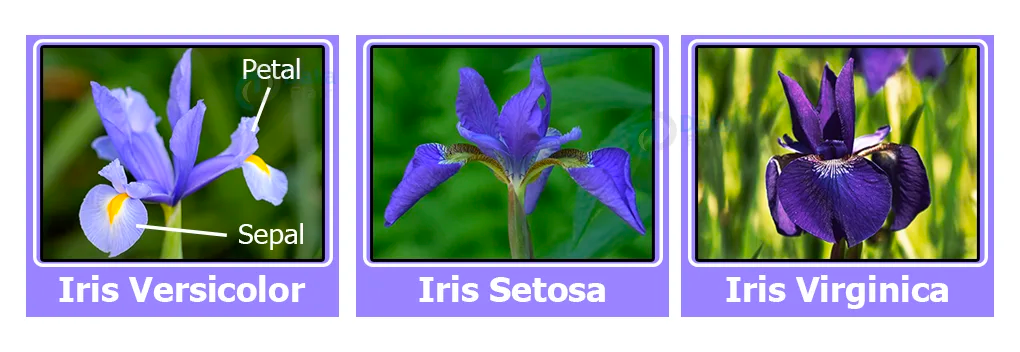

In [5]:
# np.c_ é uma função numpy para concatenar array
df = pd.DataFrame(data= np.c_[data['data'], data['target']],columns= data['feature_names'] + ['target'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [6]:
X = pd.DataFrame(data= np.c_[data['data']], columns= data['feature_names'])
y = pd.DataFrame(data= np.c_[data['target']],columns= ['target'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print(f"Tamanho de X_train: {X_train.shape}")
print(f"Tamanho de X_test: {X_test.shape}")
print(f"Tamanho de y_train: {y_train.shape}")
print(f"Tamanho de y_test: {y_test.shape}")

Tamanho de X_train: (120, 4)
Tamanho de X_test: (30, 4)
Tamanho de y_train: (120, 1)
Tamanho de y_test: (30, 1)


#### Passo 4: Criar a arquitetura da rede neural

In [9]:
# A função Sequential serve para criar uma camada após a outra de forma sequencial
modelo = Sequential()
# Em seguida para criar cada camada usa-se .add(dados da nova camada)

# units = quantidade de neurônios
# activation = função de ativação https://keras.io/api/layers/activations/ 
# input_dim = Dimensão do conjunto de dados de entrada

# 1º Camada
modelo.add(Dense(units=3, activation="relu", input_dim=X_train.shape[1]))

# 2º Camada (neurônio de saída)
modelo.add(Dense(units=1, activation="linear"))

#### Passo 4: Treinando a rede neural

In [10]:
# loss = Função de custo
# optimizer = Otimizadores
# metrics = métrica utilizada para acompanhar o treinamento
modelo.compile(loss="mse", optimizer="adam", metrics=["mae"])

# epochs = quantidade de épocas
# batch_size = 
# validation_data = informa o resultado do teste durante o treinamento
resultado = modelo.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 227ms/step - loss: 1.9931 - mae: 1.1654 - val_loss: 1.9091 - val_mae: 1.1354
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1.8624 - mae: 1.1290 - val_loss: 1.8292 - val_mae: 1.1208
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.7664 - mae: 1.0984 - val_loss: 1.7516 - val_mae: 1.1047
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.6765 - mae: 1.0762 - val_loss: 1.6808 - val_mae: 1.0887
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.6716 - mae: 1.0737 - val_loss: 1.6155 - val_mae: 1.0724
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.7429 - mae: 1.1153 - val_loss: 1.5569 - val_mae: 1.0565
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.4931 - mae: 1.0356 - val_loss: 1.5031 - val_mae: 1.0410
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.2485 - mae: 0.9222 - val_loss: 1.4527 - val_mae: 1.0257
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 1.3557 - mae:

#### Passo : Visualizando o histórico de treinamento

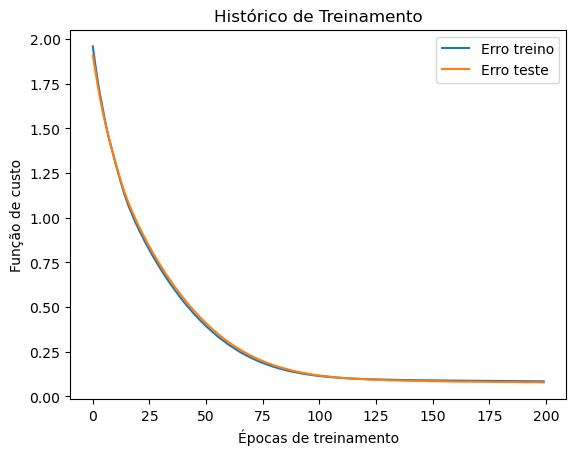

In [11]:
plt.plot(resultado.history["loss"])
plt.plot(resultado.history["val_loss"])
plt.title("Histórico de Treinamento")
plt.ylabel("Função de custo")
plt.xlabel("Épocas de treinamento")
plt.legend(["Erro treino", "Erro teste"])
plt.show()